##### my github page: https://github.com/1-oz   **Please Note: This is a project aimed at building a reliable predictor model for customer churn, and only a few part of this proj is shown here due to the 2-page limitation, so it might seem incomplete.
#### 1. import data & explorative analysis

In [8]:
train0 = pd.read_excel(io='./QWE_training_data.xlsx')
test0 = pd.read_excel(io='./QWE_test_data.xlsx')
train = train0.iloc[:,2:]
test = test0.iloc[:,2:]
lost = train.loc[train['Churn']==1]
own = train.loc[train['Churn']==0]

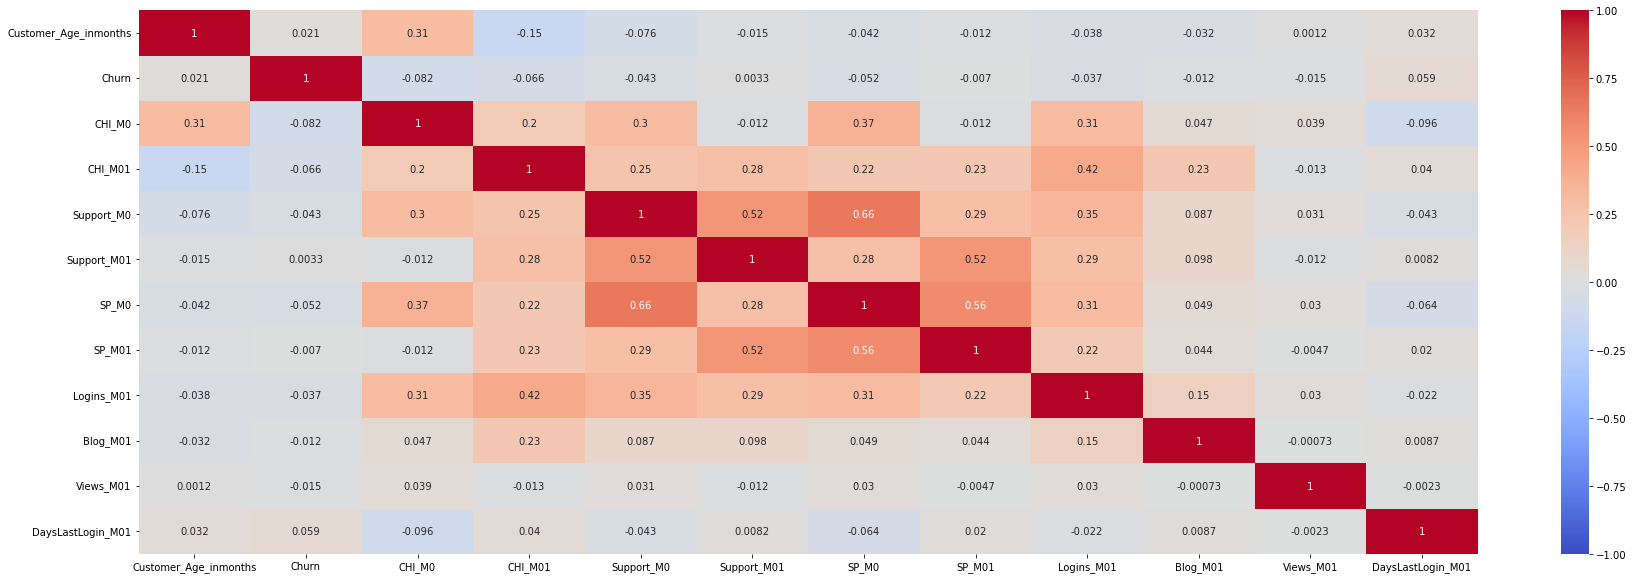

In [14]:
corr = train.corr()
plt.figure(figsize=(30, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.show()

#### 2. Logistic Regression Predictor

In [29]:
train = train0.iloc[:,2:]
test = test0.iloc[:,2:]
X_train = train.drop(['Churn'],axis=1)
y_train = train['Churn']
X_test = test.drop(['Churn'],axis=1)
y_test = test['Churn']
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [52]:
weights = {0:1,1:14.5}
model2 =LogisticRegression(class_weight=weights)
model2.fit(X_train_std,y_train)
y_pred_2 = model2.predict(X_test_std)
print('overall accuracy:',model2.score(X_test_std,y_test))

overall accuracy: 0.8


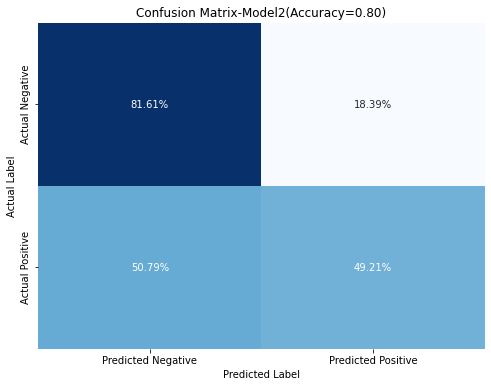

                 Predicted Negative  Predicted Positive
Actual Negative                 985                 222
Actual Positive                  32                  31
Precision: 0.1225296442687747 recall: 0.49206349206349204


In [53]:
cm = confusion_matrix(y_test, y_pred_2)
class_totals = cm.sum(axis=1, keepdims=True)
normalized_cm = cm / class_totals
df_confusion_matrix = pd.DataFrame(normalized_cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(df_confusion_matrix, annot=True, cmap='Blues', fmt='.2%', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-Model2(Accuracy={:.2f})'.format(model2.score(X_test_std,y_test)))
plt.show()
df_cm = pd.DataFrame(cm, index=['Actual Negative','Actual Positive'], columns=['Predicted Negative','Predicted Positive'])
print(df_cm)
true_positive = df_cm.at['Actual Positive', 'Predicted Positive']
false_positive = df_cm.at['Actual Negative', 'Predicted Positive']
false_negative = df_cm.at['Actual Positive', 'Predicted Negative']
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
print('Precision:',precision,'recall:',recall)

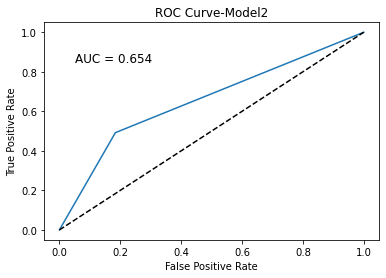

auc: 0.6540682000499731


In [54]:
auc_model2 = roc_auc_score(y_test, y_pred_2)
y_scores_2 = model2.decision_function(X_test_std)
y_true_binary = label_binarize(y_test, classes=[0, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_pred_2)
plt.plot(fpr, tpr,label='AUC = {:.2f}'.format(auc_model2))
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.text(0.05, 0.9, 'AUC = {:.3f}'.format(auc_model2), fontsize=12,va='top')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve-Model2')
plt.show()
print('auc:',auc_model2)